In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import cv2
import os
import math
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(33)

2023-07-18 10:37:37.737961: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession



config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
sess = tf.Session(config = config)

2023-07-18 10:37:39.318678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 10:37:39.321350: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-18 10:37:39.399749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-18 10:37:39.399837: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-18 10:37:39.421019: I tensorflow/stream_executor/platform/default

In [3]:
df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Day_balance.csv')


# df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_renwu.csv')
# df1 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_linyuan.csv')
# df2 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_xitun.csv')
# df3 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_taixi.csv')
# df4 = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation_douliu.csv')
# df5 = pd.read_csv('/mnt/harry/air_quality/Datasets/taoyuan/桃園_24h_new.csv')


# df = pd.read_csv('/mnt/harry/air_quality/Program/backup/Balance_EPA_Dataset_agumentation.csv')
# df = pd.read_csv('/mnt/harry/air_quality/Datasets/renwu/仁武_24h.csv')
# df1 = pd.read_csv('/mnt/harry/air_quality/Datasets/linyuan/林園_24h.csv')
# df2 = pd.read_csv('/mnt/harry/air_quality/Datasets/xitun/西屯_24h.csv')
# df3 = pd.read_csv('/mnt/harry/air_quality/Datasets/taixi/台西_24h.csv')
# df4 = pd.read_csv('/mnt/harry/air_quality/Datasets/douliu/斗六_24h.csv')
# df5 = pd.read_csv('/mnt/harry/air_quality/Datasets/taoyuan/桃園_24h_new.csv')

In [4]:
# df = pd.concat([df, df1, df2, df3, df4])

In [5]:
df = df.sample(frac=1, random_state=42)

# 重置索引
df = df.reset_index(drop=True)

In [6]:
#append '.jpg' to the filename column

def append_ext(fn):
    if fn.endswith(".jpg"):
        return fn 
    else:
        return fn + '.jpg'

In [7]:
df['filename'] = df['filename'].astype(str).apply(append_ext)
df

# df_og['filename'] = df_og['filename'].astype(str).apply(append_ext)
# df_og

,filename,pm2.5_concentration
0,MH_UnFSG_2023-02-17-19.00-2-9.jpg_r.jpg,86.0
1,32_201911221600_r.jpg,5.0
2,52_201912050100.jpg,34.0
3,49_201908070600_r.jpg,15.0
4,49_202003090900.jpg,15.0
...,...,...
12931,HAR_VUN_2022-10-02-10.00-1-4737.jpg_r.jpg,185.0
12932,49_202002081800.jpg,38.0
12933,HAR_VUN_2022-10-02-10.00-1-977.jpg,185.0
12934,BENGR_UHFSG_2023-02-03-08.30-1-8.jpg_r.jpg,76.0


In [8]:
# df_all = pd.concat([df,df_og])

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:

# # creating instance of labelencoder
# labelencoder = LabelEncoder()

# # Assigning numerical values and storing in another column
# df['pm2.5_label'] = labelencoder.fit_transform(df['pm2.5_concentration'])
# #df.drop('pm2.5_concentration', axis=1)
# del df['pm2.5_concentration']
# df

In [11]:
y = []
for i in range(len(df)):
    try:
        imgtest = image.load_img('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/'+df.iloc[i, 0])
        imgtest = image.img_to_array(imgtest)
        if np.all(imgtest[:,:,0] == imgtest[:,:,1]) and np.all(imgtest[:,:,1] == imgtest[:,:,2]): #if night

            pass
#             y.append(df.iloc[i, 1])
        else:#if day

#             pass
            
            y.append(df.iloc[i, 1])
    except FileNotFoundError:
        print(df.iloc[i, 0])
        pass


    

MH_UnFSG_2023-02-17-19.00-2-9.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3753.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-1-18.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1689.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-2-59.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-138.jpg_r.jpg
MH_UnFSG_2023-03-10-16.00-1-346.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2713.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-220.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-76.jpg_r.jpg
BENGR_UHFSG_2023-02-05-08.30-1-1.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4881.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-2-34.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-11.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-265.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4921.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-251.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-88.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-170.jpg_r.jpg
BENGR_Good_2023-03-21-08.30-1-113.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-161.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-421.jpg_r.jpg
BENGR_Mod_2023-03-04-08.30-1-361.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3177.jpg_r.jpg
HA

MH_UN_2023-03-02-08.00-3.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2809.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-48.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-95.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-56.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-26.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-4.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-18.jpg_r.jpg
BENGR_UHFSG_2023-02-05-08.30-1-11.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-78.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-123.jpg_r.jpg
BENGR_Good_2023-02-26-08.30-1-296.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1449.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-266.jpg_r.jpg
MH_UnFSG_2023-02-23-11.00-1-101.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-28.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-7.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-48.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-2-45.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-316.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2825.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-7.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-6.jpg_r.jpg
MH_UH_2023-02-19-12.00-1-33.jpg_r.jpg
MH_UnFSG_20

DEL_VUnH_2023-02-16-17.00-2-26.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-406.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-41.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-473.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-361.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3345.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-25.jpg_r.jpg
DEL_SEV_2023-02-16-18.00-2-91.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-32.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-217.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-45.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-21.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-80.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-34.jpg_r.jpg
DEL_VUnH_2023-02-16-14.00-3-57.jpg_r.jpg
MH_VUN_2023-02-25-10.00-1-281.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-1-77.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-55.jpg_r.jpg
BENGR_Mod_2023-02-23-08.30-1-561.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3641.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-51.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-164.jpg_r.jpg
DEL_VUnH_2023-02-16-14.00-2-28.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-91.jpg_r.jpg
HAR_VUN_202

MH_UH_2023-02-03- 09.30-1-47.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-873.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-661.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-97.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-125.jpg_r.jpg
MH_UN_2023-03-15-15.00-1.jpg_r.jpg
Dimapur_MOD_2023-02-10-08.30-2-68.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-1-51.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-81.jpg_r.jpg
MH_UnFSG_2023-03-08-11.00-1-356.jpg_r.jpg
BENGR_Mod_2023-02-25-08.30-1-376.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-1-66.jpg_r.jpg
DL_VUNH_2023-02-04-17.00-1-38.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-283.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-29.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-1-69.jpg_r.jpg
MH_VUN_2023-02-25-10.00-1-16.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4497.jpg_r.jpg
MH_UN_2023-03-02-08.00-1-116.jpg_r.jpg
MH_UN_2023-03-15-15.00-6.jpg_r.jpg
BENGR_Good_2023-02-26-08.30-1-401.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-849.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-1.jpg_r.jpg
MH_VUN_2023-03-05-08.30-2.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4113.jpg_r

BENGR_Mod_2023-03-09-08.30-1-491.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1673.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-441.jpg_r.jpg
BENGR_Mod_2023-02-23-08.30-1-556.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4761.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-345.jpg_r.jpg
MH_UN_2023-03-16-11.00-1-36.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-4.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-201.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2305.jpg_r.jpg
MH_UN_2023-03-02-08.00-2.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-337.jpg_r.jpg
MH_UN_2023-03-13-10.00-1-15.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3361.jpg_r.jpg
MH_UN_2023-03-16-11.00-1-155.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2609.jpg_r.jpg
MH_UN_2023-03-15-15.00-1-400.jpg_r.jpg
MH_UN_2023-03-12-13.00-1-15.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-80.jpg_r.jpg
MH_UnFSG_2023-03-08-11.00-1-1.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2049.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-55.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-54.jpg_r.jpg
MH_UH_2023-02-11-03.30-1-17.jpg_r.jpg
BENGR_Mod_2023-02-23-08.30-1-486.jpg

MH_UH_2023-02-11-03.30-1-40.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-81.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1585.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-22.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-91.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-62.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-39.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-122.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2777.jpg_r.jpg
BENGR_UnFSG_2023-03-08-08.30-1-186.jpg_r.jpg
MH_UN_2023-03-15-15.00-1-372.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-47.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-137.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-82.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-2-120.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-16.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-39.jpg_r.jpg
MH_UnFSG_2023-03-08-11.00-1-141.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-29.jpg_r.jpg
DEL_SEV_2023-02-16-18.00-2-61.jpg_r.jpg
MH_UN_2023-03-15-15.00-1-309.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-70.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-186.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-266.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-2-49.jpg

MH_UH_2023-02-11-03.30-1-9.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-59.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-33.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-491.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-706.jpg_r.jpg
MH_UN_2023-03-02-08.00-1-136.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-47.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-17.jpg_r.jpg
MH_UN_2023-03-02-08.00-1-66.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-158.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-133.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-73.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-3.jpg_r.jpg
MH_VUN_2023-03-05-08.30-2-346.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-2-5.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-1-10.jpg_r.jpg
DL_VUNH_2023-02-04-17.00-1-13.jpg_r.jpg
MH_UN_2023-03-16-11.00-1-190.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-2-21.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-681.jpg_r.jpg
MH_UnFSG_2023-02-16-17.00-5.jpg_r.jpg
MH_UN_2023-03-16-11.00-1-169.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-45.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-466.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-30

MH_UN_2023-03-02-08.00-1-26.jpg_r.jpg
MH_UnFSG_2023-02-23-11.00-1-221.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-22.jpg_r.jpg
BENGR_UnFSG_2023-03-08-08.30-1-126.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-52.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-14.jpg_r.jpg
MH_UnFSG_2023-02-23-11.00-1-171.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-10.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-253.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4129.jpg_r.jpg
BENGR_Good_2023-02-26-08.30-1-66.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-321.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-96.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-1-57.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-2-34.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-1-531.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-8.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-3-62.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-37.jpg_r.jpg
BENGR_Good_2023-03-25-08.30-1-34.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-127.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-161.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-206.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-45.jpg_r.jpg
DEL_VUn

MH_UN_2023-03-16-11.00-3.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-59.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-119.jpg_r.jpg
MH_UH_2023-02-14-11.30-5.jpg_r.jpg
BENGR_Mod_2023-02-21-08.30-1-246.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-666.jpg_r.jpg
MH_VUN_2023-03-05-08.30-2-126.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-78.jpg_r.jpg
MH_Good_2023-03-23-17.00-1-218.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-53.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-256.jpg_r.jpg
MH_UnFSG_2023-03-10-16.00-1-401.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-1-70.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-199.jpg_r.jpg
BENGR_UHFSG_2023-02-09-08.30-1-41.jpg_r.jpg
BENGR_Mod_2023-03-09-08.30-1-106.jpg_r.jpg
MH_UnFSG_2023-02-16-17.00-1.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-182.jpg_r.jpg
MH_UN_2023-03-02-08.00-1-271.jpg_r.jpg
BENGR_Good_2023-02-28-08.30-1-216.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-793.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-2-4.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-1-39.jpg_r.jpg
DEL_UnH_2023-02-15-11.30-2-29.jpg_r.jpg
MH_UH_2023-02-02

MH_UnFSG_2023-03-14-13.00-1-319.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-2-2.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-12.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-61.jpg_r.jpg
MH_VUN_2023-03-05-08.30-2-356.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3737.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-2-19.jpg_r.jpg
MH_UnFSG_2023-02-15-10.30-3.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3097.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-31.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1569.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-21.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2929.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-2-13.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-3-231.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-15.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-19.jpg_r.jpg
BENGR_UnFSG_2023-03-08-08.30-1-376.jpg_r.jpg
MH_UN_2023-03-12-13.00-1-22.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4193.jpg_r.jpg
MH_VUN_2023-03-05-08.30-1-21.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-38.jpg_r.jpg
BENGR_Mod_2023-03-06-08.30-1-181.jpg_r.jpg
DEL_SEV_2023-02-22-14.00-2-581.jpg_r.jpg
MH_UnFSG_2023-03

MH_UN_2023-03-13-10.00-1-155.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-83.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-72.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2833.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-561.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-165.jpg_r.jpg
MH_VUN_2023-02-25-10.00-1-66.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-32.jpg_r.jpg
DL_VUNH_2023-02-04-17.00-1-11.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-83.jpg_r.jpg
MH_UH_2023-02-19-12.00-1-18.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-545.jpg_r.jpg
DL_VUNH_2023-02-04-17.00-1-56.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-3-52.jpg_r.jpg
DEL_VUnH_2023-02-16-14.00-2-13.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4713.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3009.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-100.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-11.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2449.jpg_r.jpg
BENGR_UnFSG_2023-03-08-08.30-1-151.jpg_r.jpg
BENGR_Good_2023-02-28-08.30-1-296.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-6.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-57.jpg_r.jpg
DEL_SEV_202

MH_UH_2023-02-03- 09.30-1-76.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-3-186.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-7.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-74.jpg_r.jpg
MH_UnFSG_2023-02-15-10.30-1.jpg_r.jpg
MH_UnFSG_2023-03-10-16.00-1-16.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-2-15.jpg_r.jpg
BENGR_Mod_2023-02-23-08.30-1-151.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-17.jpg_r.jpg
MH_UH_2023-02-11-03.30-1-10.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-4.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-1-4.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3985.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-206.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1433.jpg_r.jpg
MH_UH_2023-02-11-03.30-2-46.jpg_r.jpg
DEL_SEV_2023-02-16-18.00-2-45.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-41.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-2-48.jpg_r.jpg
DEL_VUnH_2023-02-16-14.00-3-1.jpg_r.jpg
MH_UnFSG_2023-03-14-13.00-1-85.jpg_r.jpg
BENGR_UnFSG_2023-03-08-08.30-1-21.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-60.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1185.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2

MH_UN_2023-03-12-13.00-1-267.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-75.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-137.jpg_r.jpg
MH_UnFSG_2023-02-15-10.30-1-54.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-14.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-2-8.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-511.jpg_r.jpg
BENGR_Mod_2023-02-25-08.30-1-381.jpg_r.jpg
MH_UN_2023-03-15-15.00-1-204.jpg_r.jpg
BENGR_Mod_2023-02-23-08.30-1-456.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-36.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-98.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-1825.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-20.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-65.jpg_r.jpg
MH_UN_2023-03-02-08.00-1-76.jpg_r.jpg
MH_UH_2023-02-19-12.00-1-67.jpg_r.jpg
BENGR_UHFSG_2023-02-09-08.30-1-10.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-75.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-16.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-262.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-50.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-118.jpg_r.jpg
MH_UH_2023-02-11-03.30-1-14.jpg_r.jpg
MH_VUN_2023-02-24-15.00-1-181.jp

DEL_SEV_2023-02-22-14.00-2-416.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-10.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4985.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-28.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-42.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-161.jpg_r.jpg
MH_VUN_2023-02-25-10.00-2.jpg_r.jpg
MH_UnFSG_2023-03-10-16.00-1-146.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-2-100.jpg_r.jpg
BENGR_Good_2023-02-19-08.30-1-37.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-177.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-17.jpg_r.jpg
MH_VUN_2023-02-25-10.00-1-216.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-421.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4329.jpg_r.jpg
DEL_SEV_2023-02-16-18.00-2-29.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-1-71.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-158.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-2.jpg_r.jpg
MH_UN_2023-03-02-08.00-1.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3481.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2721.jpg_r.jpg
MH_UN_2023-03-02-08.00-1-296.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-45.jpg_r.jpg
MH_UH_2023-02-10-

DEL_SEV_2023-02-07-14.00-1-108.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-17.jpg_r.jpg
BENGR_Good_2023-03-17-08.30-1-71.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-3889.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4345.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4041.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-45.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-73.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-2-376.jpg_r.jpg
MH_UN_2023-03-15-15.00-2.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-1-48.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-10.jpg_r.jpg
MH_UH_2023-02-02- 09.30-1-26.jpg_r.jpg
BENGR_Mod_2023-03-01-08.30-1-171.jpg_r.jpg
MH_UN_2023-03-13-10.00-1-211.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-57.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2801.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-71.jpg_r.jpg
MH_Good_2023-03-23-17.00-1-99.jpg_r.jpg
MH_UN_2023-03-12-13.00-1-393.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-98.jpg_r.jpg
MH_UnFSG_2023-02-15-10.30-1-52.jpg_r.jpg
DEL_VUnH_2023-02-16-17.00-1-144.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-87.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-5.j

DEL_VUnH_2023-02-16-14.30-1-193.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2425.jpg_r.jpg
MH_UnFSG_2023-02-17-19.00-2-33.jpg_r.jpg
BENGR_UHFSG_2023-02-09-08.30-1-36.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-240.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-23.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-42.jpg_r.jpg
MH_VUN_2023-03-05-08.30-2-171.jpg_r.jpg
DL_VUNH_2023-02-04-17.00-1-79.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2841.jpg_r.jpg
DEL_SEV_2023-02-17-13.00-1-46.jpg_r.jpg
BENGR_Mod_2023-03-13-08.30-1-127.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-27.jpg_r.jpg
MH_UN_2023-03-13-10.00-1-169.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-2329.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-41.jpg_r.jpg
DEL_VUnH_2023-02-16-14.30-1-95.jpg_r.jpg
Dimapur_UHFSG_2023-02-02- 09.00-1-62.jpg_r.jpg
MH_UN_2023-03-02-08.00-4.jpg_r.jpg
BENGR_Mod_2023-03-04-08.30-1-181.jpg_r.jpg
MH_Good_2023-03-23-17.00-1-442.jpg_r.jpg
MH_UnFSG_2023-02-17-13.00-2-13.jpg_r.jpg
BENGR_Good_2023-03-21-08.30-1-267.jpg_r.jpg
MH_UH_2023-02-14-11.30-1-27.jpg_r.jpg
BENGR_UnFSG_2

MH_UN_2023-03-13-10.00-1-148.jpg_r.jpg
MH_UH_2023-02-03- 09.30-1-87.jpg_r.jpg
DEL_SEV_2023-02-20-14.00-1-556.jpg_r.jpg
MH_UnFSG_2023-03-08-11.00-1-61.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-71.jpg_r.jpg
MH_UnFSG_2023-03-18-11.00-1-92.jpg_r.jpg
MH_UN_2023-03-12-13.00-1-176.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-149.jpg_r.jpg
DEL_SEV_2023-02-07-14.00-1-41.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4313.jpg_r.jpg
MH_Good_2023-03-22-18.00-1-19.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-12.jpg_r.jpg
MH_UnFSG_2023-03-10-16.00-1-256.jpg_r.jpg
DEL_VUH_2023-02-04-17.00-2-66.jpg_r.jpg
MH_UH_2023-02-10-14.30-1-39.jpg_r.jpg
HAR_VUN_2022-10-02-10.00-1-4737.jpg_r.jpg
BENGR_UHFSG_2023-02-03-08.30-1-8.jpg_r.jpg
MH_VUN_2023-03-05-08.30-1-11.jpg_r.jpg


In [12]:
y

[5.0,
 34.0,
 15.0,
 15.0,
 174.0,
 25.0,
 370.0,
 72.0,
 115.8,
 13.0,
 114.0,
 31.0,
 78.8,
 10.0,
 185.0,
 13.0,
 4.0,
 174.0,
 86.0,
 18.0,
 418.0,
 76.0,
 12.0,
 167.0,
 56.0,
 257.0,
 14.0,
 72.0,
 337.0,
 42.0,
 26.0,
 11.0,
 337.0,
 36.0,
 40.0,
 50.0,
 67.0,
 7.0,
 72.0,
 337.0,
 257.0,
 185.0,
 29.0,
 9.0,
 32.0,
 25.0,
 13.0,
 174.0,
 29.0,
 305.0,
 11.0,
 9.0,
 39.0,
 337.0,
 8.0,
 43.0,
 9.0,
 48.0,
 180.0,
 39.0,
 500.0,
 279.0,
 36.0,
 132.0,
 174.0,
 14.0,
 45.0,
 15.0,
 27.0,
 43.0,
 72.0,
 5.0,
 36.0,
 45.0,
 337.0,
 8.0,
 51.0,
 33.0,
 53.0,
 2.0,
 14.0,
 48.0,
 11.0,
 370.0,
 115.8,
 185.0,
 287.0,
 12.0,
 7.0,
 401.0,
 29.0,
 174.0,
 56.0,
 31.0,
 29.0,
 40.0,
 51.0,
 14.0,
 16.0,
 2.0,
 41.0,
 27.0,
 51.0,
 12.0,
 12.0,
 401.0,
 14.0,
 14.0,
 36.0,
 174.0,
 337.0,
 13.0,
 38.0,
 27.0,
 185.0,
 12.0,
 14.0,
 13.0,
 90.0,
 185.0,
 45.0,
 3.0,
 16.0,
 32.0,
 29.0,
 6.0,
 23.0,
 32.0,
 34.0,
 51.0,
 7.0,
 180.0,
 10.0,
 30.0,
 7.0,
 370.0,
 12.0,
 174.0,
 132.0,
 32.0

In [13]:
len(y)

9365

In [14]:
from sklearn.cluster import KMeans
from PIL import Image
def get_dark_channel(img, window_size):
    """
    將輸入的圖片轉換為 dark channel。
    
    Args:
        img: 輸入圖片，必須為三通道的彩色圖片。
        window_size: 窗口大小，應為正整數。
    
    Returns:
        輸出 dark channel 圖片。
    """
    # 計算 min filter。
    min_filter = cv2.erode(img, np.ones((window_size, window_size), np.uint8))
    
    # 取得 dark channel。
    dark_channel = np.min(min_filter, axis=1)
    
    return dark_channel
def sub_mean(img):
    img = img.copy()
    img = img.astype(np.float16)
    mean = np.array([127.0]).astype(np.float16)
    img -= mean
    return img
#     img = cv2.convertScaleAbs(img)
def nor(img):
    # 對每個通道，計算平均值和標準差
    means = np.mean(img)
    stds = np.std(img)

    # 將每個像素標準化
    normalized_img = (img - means) / stds
#     normalized_img = (normalized_img).astype(np.float16)
    # 轉換回圖像並保存
#     normalized_img = Image.fromarray(normalized_img)

    return normalized_img
def build_x(path):
    train_img = []
    df.reset_index()
    for i in range(len(df)): 
        print(i)
        try:
            img =  plt.imread(path + df.iloc[i, 0])
            img = image.img_to_array(img)
            if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):#if night 
# #                 hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
# #                 sv_img = hsv_img[:,:,1:]
# #                 img = sv_img
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#                 img = img.astype(np.float16)
                
# #                 print(img)
# #                 img = cv2.convertScaleAbs(img)
                

# #-----------------------------------------------------------------------------------                
# #                 fil = np.array([[ 1,1, 0],                        #myfilter
# #                 [ 1, 0, -0.8],
# #                 [  0, -0.8, -0.8]])
# #                 img = cv2.filter2D(img,-1,fil)   
#  #--------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# #                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
# #                 img = sobelx

# #----------------------------------------------------------------------
# #                 img = cv2.medianBlur(img,3)
# #------------------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# # #            CLAHE值方圖均衡化
# #                 clahe = cv2.createCLAHE(clipLimit=2.0)
# #                 img = clahe.apply(img)  
# #                 img = img.astype(np.float16)
# #                 img = cv2.medianBlur(img,7)
# #                 img = sub_mean(img)
# #                 img = nor(img)
#                 img = img/255.0
#                 img = np.expand_dims(img, axis=-1)
#                 train_img.append(img)
                 pass
            else:#if day
#                 pass

#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img.astype(np.float32)


 #--------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
#                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
#                 img = sobelx

#----------------------------------------------------------------------
#                 img = cv2.medianBlur(img,3)
#------------------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
# #            CLAHE值方圖均衡化
#                 clahe = cv2.createCLAHE(clipLimit=2.0)
#                 img = clahe.apply(img)  
#                 img = img.astype(np.float16)
#                 img = cv2.medianBlur(img,7)
#                 img = sub_mean(img)
                img = nor(img)
#                 img = img/255.0
#                 img = np.expand_dims(img, axis=-1)
                train_img.append(img)
            
        except FileNotFoundError:
            pass

    x = np.array(train_img)
    print(x.shape)
    return x

In [15]:
from sklearn.cluster import KMeans
from PIL import Image
def get_dark_channel(img, window_size):
    """
    將輸入的圖片轉換為 dark channel。
    
    Args:
        img: 輸入圖片，必須為三通道的彩色圖片。
        window_size: 窗口大小，應為正整數。
    
    Returns:
        輸出 dark channel 圖片。
    """
    # 計算 min filter。
    min_filter = cv2.erode(img, np.ones((window_size, window_size), np.uint8))
    
    # 取得 dark channel。
    dark_channel = np.min(min_filter, axis=1)
    
    return dark_channel
def sub_mean(img):
    img = img.copy()
    img = img.astype(np.float16)
    mean = np.array([127.0]).astype(np.float16)
    img -= mean
    return img
#     img = cv2.convertScaleAbs(img)
def nor(img):
    # 對於每個通道，計算平均值和標準差
    means = np.mean(img)
    stds = np.std(img)

    # 將每個像素標準化
    normalized_img = (img - means) / stds

#     normalized_img = (normalized_img).astype(np.float16)
    # 轉換回圖像並保存
#     normalized_img = Image.fromarray(normalized_img)

    return normalized_img
def build_x2(path):
    train_img = []
    df.reset_index()
    for i in range(len(df)): 
        print(i)
        try:
            img =  plt.imread(path + df.iloc[i, 0])
            img = image.img_to_array(img)
            if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):#if night 
# #                 hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
# #                 sv_img = hsv_img[:,:,1:]
# #                 img = sv_img
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#                 img = img.astype(np.float16)
                
# #                 print(img)
# #                 img = cv2.convertScaleAbs(img)
                

# #-----------------------------------------------------------------------------------                
# #                 fil = np.array([[ 1,1, 0],                        #myfilter
# #                 [ 1, 0, -0.8],
# #                 [  0, -0.8, -0.8]])
# #                 img = cv2.filter2D(img,-1,fil)   
#  #--------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# #                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
# #                 img = sobelx

# #----------------------------------------------------------------------
# #                 img = cv2.medianBlur(img,3)
# #------------------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# # #            CLAHE值方圖均衡化
# #                 clahe = cv2.createCLAHE(clipLimit=2.0)
# #                 img = clahe.apply(img)  
# #                 img = img.astype(np.float16)
# #                 img = cv2.medianBlur(img,7)
# #                 img = sub_mean(img)
#                 img = nor(img)
#                 img = img/255.0
#                 img = np.expand_dims(img, axis=-1)
#                 train_img.append(img)
                pass
            else:#if day
#                 pass

                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img.astype(np.float32)


 #--------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
#                 img = cv2.medianBlur(img,5)
                sobelx = cv2.Sobel(img,cv2.CV_32F, 1,0, ksize=3)
                sobely = cv2.Sobel(img,cv2.CV_32F, 0,1, ksize=3)
                sobelx = cv2.convertScaleAbs(sobelx)
                sobely = cv2.convertScaleAbs(sobely)
                img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)


#----------------------------------------------------------------------
#                 img = cv2.medianBlur(img,3)
#------------------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
# #            CLAHE值方圖均衡化
#                 clahe = cv2.createCLAHE(clipLimit=2.0)
#                 img = clahe.apply(img)  
#                 img = img.astype(np.float16)
#                 img = cv2.medianBlur(img,7)
#                 img = sub_mean(img)
                img = nor(img)
#                 img = img/255.0
                img = np.expand_dims(img, axis=-1)
                train_img.append(img)
            
        except FileNotFoundError:
            pass

    x = np.array(train_img)
    print(x.shape)
    return x

In [16]:
from sklearn.cluster import KMeans
from PIL import Image
def get_dark_channel(img, window_size):
    """
    將輸入的圖片轉換為 dark channel。
    
    Args:
        img: 輸入圖片，必須為三通道的彩色圖片。
        window_size: 窗口大小，應為正整數。
    
    Returns:
        輸出 dark channel 圖片。
    """
    # 計算 min filter。
    min_filter = cv2.erode(img, np.ones((window_size, window_size), np.uint8))
    
    # 取得 dark channel。
    dark_channel = np.min(min_filter, axis=1)
    
    return dark_channel
def sub_mean(img):
    img = img.copy()
    img = img.astype(np.float16)
    mean = np.array([127.0]).astype(np.float16)
    img -= mean
    return img
#     img = cv2.convertScaleAbs(img)
def nor(img):
    # 對於每個通道，計算平均值和標準差
    means = np.mean(img)
    stds = np.std(img)

    # 將每個像素標準化
    normalized_img = (img - means) / stds

#     normalized_img = (normalized_img).astype(np.float16)
    # 轉換回圖像並保存
#     normalized_img = Image.fromarray(normalized_img)

    return normalized_img
def build_x3(path):
    train_img = []
    df.reset_index()
    for i in range(len(df)): 
        print(i)
        try:
            img =  plt.imread(path + df.iloc[i, 0])
            img = image.img_to_array(img)
            if np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2]):#if night 
# #                 hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
# #                 sv_img = hsv_img[:,:,1:]
# #                 img = sv_img
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#                 img = img.astype(np.float16)
                
# #                 print(img)
# #                 img = cv2.convertScaleAbs(img)
                

# #-----------------------------------------------------------------------------------                
# #                 fil = np.array([[ 1,1, 0],                        #myfilter
# #                 [ 1, 0, -0.8],
# #                 [  0, -0.8, -0.8]])
# #                 img = cv2.filter2D(img,-1,fil)   
#  #--------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# #                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
# #                 img = sobelx

# #----------------------------------------------------------------------
                
#                 img = cv2.medianBlur(img,3)
# #------------------------------------------------------------------------
# #                 img = cv2.convertScaleAbs(img)
# # #            CLAHE值方圖均衡化
# #                 clahe = cv2.createCLAHE(clipLimit=2.0)
# #                 img = clahe.apply(img)  
# #                 img = img.astype(np.float16)
# #                 img = cv2.medianBlur(img,7)
# #                 img = sub_mean(img)
# #                 img = nor(img)
#                 img = img/255.0
#                 img = np.expand_dims(img, axis=-1)
#                 train_img.append(img)
                pass
            else:#if day
#                 pass

                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                img = img.astype(np.float32)


 #--------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
#                 img = cv2.medianBlur(img,5)
#                 sobelx = cv2.Sobel(img,cv2.CV_64F, 1,0, ksize=3)
#                 sobely = cv2.Sobel(img,cv2.CV_64F, 0,1, ksize=3)
#                 sobelx = cv2.convertScaleAbs(sobelx)
#                 sobely = cv2.convertScaleAbs(sobely)
#                 img = cv2.addWeighted(sobelx,0.5,sobely,0.5, 0)
#                 img = sobelx

#----------------------------------------------------------------------
                img = cv2.medianBlur(img,3)
#------------------------------------------------------------------------
#                 img = cv2.convertScaleAbs(img)
# #            CLAHE值方圖均衡化
#                 clahe = cv2.createCLAHE(clipLimit=2.0)
#                 img = clahe.apply(img)  
#                 img = img.astype(np.float16)
#                 img = cv2.medianBlur(img,7)
#                 img = sub_mean(img)
                img = nor(img)
#                 img = img/255.0
                img = np.expand_dims(img, axis=-1)
                train_img.append(img)
            
        except FileNotFoundError:
            pass

    x = np.array(train_img)
    print(x.shape)
    return x

In [17]:

x_origin = build_x('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137


3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940


5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740


7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383


8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032


10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
1059

11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
1208

In [18]:

x_origin2 = build_x2('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770


5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473


6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192


8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925


10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
1059

11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
1196

In [19]:

x_origin3 = build_x3('/mnt/harry/air_quality/Datasets/all_EPA_24h_reverse/all_EPA_24h/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080


3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759


5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446


6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167


8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885


10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
1053

11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
1205

In [20]:
x_origin_train, x_origin_temp, x_origin_train2, x_origin_temp2, x_origin_train3, x_origin_temp3,   y_train, y_temp = train_test_split(x_origin, x_origin2,x_origin3,  y, train_size=0.7,random_state=25,shuffle=True)

In [21]:
x_origin_valid, x_origin_test, x_origin_valid2, x_origin_test2, x_origin_valid3, x_origin_test3, y_valid, y_test = train_test_split(x_origin_temp,x_origin_temp2, x_origin_temp3, y_temp, test_size=0.5,random_state=25,shuffle=True)

In [22]:
x_origin = []
x_origin2 = []
x_origin3 = []
train_img = []

In [23]:
x_origin_train

array([[[[ 1.784051  ,  1.5539893 ,  1.2319031 ],
         [ 1.7687135 ,  1.5386518 ,  1.2165656 ],
         [ 1.7687135 ,  1.5386518 ,  1.2165656 ],
         ...,
         [ 0.6797552 ,  0.6644178 ,  0.60306805],
         [ 0.6797552 ,  0.6644178 ,  0.60306805],
         [ 0.6797552 ,  0.6644178 ,  0.60306805]],

        [[ 1.6613514 ,  1.4312898 ,  1.1092036 ],
         [ 1.6613514 ,  1.4312898 ,  1.1092036 ],
         [ 1.646014  ,  1.4159523 ,  1.0938661 ],
         ...,
         [ 0.5570557 ,  0.54171824,  0.4803685 ],
         [ 0.5570557 ,  0.54171824,  0.4803685 ],
         [ 0.5570557 ,  0.54171824,  0.4803685 ]],

        [[ 1.6766888 ,  1.4159523 ,  1.1092036 ],
         [ 1.6766888 ,  1.4159523 ,  1.1092036 ],
         [ 1.6766888 ,  1.4159523 ,  1.1092036 ],
         ...,
         [ 0.5570557 ,  0.54171824,  0.4803685 ],
         [ 0.5570557 ,  0.54171824,  0.4803685 ],
         [ 0.5570557 ,  0.54171824,  0.4803685 ]],

        ...,

        [[-1.4981613 , -1.4828238 , -1

In [24]:
#clean useless data temp to solve the resource exhaust error
# x_origin = []
# x_origin_temp = []
# y = []

In [25]:
# plt.imshow(x_origin_train[20])

In [26]:
print(y_train[2])

47.0


In [27]:
import tensorflow.keras as keras
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, UpSampling2D, concatenate, LeakyReLU, BatchNormalization
from tensorflow.python.keras import regularizers
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.activations import tanh
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPool2D, concatenate


# def conv_pool_block(fil, x, kernels, pool_sizes):
#     concat_layers = []
#     for kernel_size, pool_size in zip(kernels, pool_sizes):
#         x = Conv2D(fil, kernel_size=kernel_size, padding="same")(x)
#         x = BatchNormalization()(x)
#         x = LeakyReLU()(x)
#         x = MaxPool2D(pool_size=pool_size)(x)
#         concat_layers.append(x)
#     merged = concatenate(concat_layers, axis=-1)
#     return merged

# 第一個輸入層
img = Input(shape=(224, 224, 3), name='img')
img0 = Input(shape=(224, 224, 1), name='img0')
img1 = Input(shape=(224, 224, 1), name='img1')

def conv_pool_block(fil, x, kernels, pool_sizes):
    concat_layers = []
    for kernel_size, pool_size in zip(kernels, pool_sizes):
        conv1 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(x)
#         conv2 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(conv1)
#         conv3 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(conv2)
#         conv4 = Conv2D(fil, kernel_size=kernel_size, activation=LeakyReLU(), padding="same")(conv3)
        if x[0] % 2 == 1 and x[1] % 2 == 1:
            padding = 'valid'
        else:
            padding = 'valid'
        pool = MaxPool2D(pool_size=pool_size, padding=padding)(conv1)
        concat_layers.append(pool)
    merged = concatenate(concat_layers, axis=-1)
    return merged

mergeall = concatenate([img,img0,img1],axis=-1)

conv_1 = conv_pool_block(32,mergeall, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
c1 = concatenate([conv_1,mergeall],axis=-1)

conv_2 = conv_pool_block(64,c1, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
c2 = concatenate([conv_1,conv_2,mergeall],axis=-1)



conv_3 = conv_pool_block(128,c2, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
c3 = concatenate([conv_1,conv_2,conv_3,mergeall],axis=-1)

conv_4 = conv_pool_block(256,c3, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
conv_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
c4 = concatenate([conv_1,conv_2,conv_3,conv_4,mergeall],axis=-1)

conv_5 = conv_pool_block(512,c4, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
conv_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
conv_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
c5 = concatenate([conv_1,conv_2,conv_3,conv_4,conv_5,mergeall],axis=-1)

conv_6 = conv_pool_block(512,c5, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])
mergeall = MaxPool2D(pool_size=(2, 2))(mergeall)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
conv_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
conv_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
conv_5 = MaxPool2D(pool_size=(2, 2))(conv_5)
c6 = concatenate([conv_1,conv_2,conv_3,conv_4,conv_5,conv_6,mergeall],axis=-1)

conv_7 = conv_pool_block(512,c6, [(3,3), (5,5), (7,7)], [(2, 2), (2, 2), (2, 2)])


flatten = Flatten()(conv_7)
flatten = Dropout(0.8)(flatten)
dense1 = Dense(100, activation=LeakyReLU(), name='dense1')(flatten)
output = Dense(1, activation='linear', name='output')(dense1)
model = Model(inputs=[img,img0,img1], outputs=output)





# 打印網絡結構
# model.summary()
# plot_model(model, to_file='./graph/model.png', show_shapes=True)
# SVG(plot_model(model, show_shapes=True).create(prog='dot', format='svg'))

In [28]:
def label_smoothing(y_true,y_pred):
    
     return tf.keras.losses.categorical_crossentropy(y_true,y_pred,label_smoothing=0.0)

In [29]:
opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
#model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1), optimizer=opt)

# opt = tf.keras.optimizers.Adam(lr=1e-4)
# model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])

# model.summary()

# opt = tf.keras.optimizers.Adam(lr=0.0001)
# model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics=["accuracy"])

import tensorflow as tf
def huber_loss(y_true, y_pred, delta=20.0):
    error = y_true - y_pred
    abs_error = tf.abs(error)
    if delta>=abs_error:
        return 0.5*(tf.square(abs_error))
    else:
        return delta*(abs_error-delta/2)
# tf.keras.losses.Huber(delta=5.0)
model.compile(loss=tf.keras.losses.Huber(delta=5.0), optimizer=opt)

# model.compile(loss=los, optimizer=opt)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
img0 (InputLayer)               [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
img1 (InputLayer)               [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 224, 224, 5)  0           img[0][0]                        
                                                                 img0[0][0]                   

In [30]:
from livelossplot import PlotLossesKeras
callback = [
    EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')
                  ]
checkpoint = ModelCheckpoint('./model_save/harry_model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='min') 
# history = model.fit(np.array(x_origin_train), np.array(y_train), validation_data=(np.array(x_origin_valid), np.array(y_valid)), batch_size=8, epochs=100, callbacks=callback,class_weight=class_weights,shuffle=True) 
history = model.fit(x=[np.array(x_origin_train), np.array(x_origin_train2), np.array(x_origin_train3)], y=np.array(y_train), validation_data=([np.array(x_origin_valid), np.array(x_origin_valid2), np.array(x_origin_valid3)], np.array(y_valid)), batch_size=16, epochs=300, callbacks=[callback], shuffle=True)

Train on 6555 samples, validate on 1405 samples
Epoch 1/300


2023-07-18 10:38:43.343290: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-18 10:38:43.343659: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-07-18 10:38:43.344236: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-07-18 10:38:43.344565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-07-18 10:38:43.344598: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-18 10:38:43.344607: I tensorflow/

6555/6555 [==============================] - 151s 23ms/sample - loss: 238.7176 - val_loss: 166.6966
Epoch 2/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 172.7581 - val_loss: 139.1047
Epoch 3/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 144.6095 - val_loss: 115.3456
Epoch 4/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 125.9577 - val_loss: 113.0540
Epoch 5/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 109.2020 - val_loss: 96.3462
Epoch 6/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 99.5018 - val_loss: 94.2872
Epoch 7/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 93.4202 - val_loss: 90.0619
Epoch 8/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 87.4411 - val_loss: 96.4977
Epoch 9/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 83.0936 - val_loss: 89.6892
Epoch 10/300


Epoch 75/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 31.4563 - val_loss: 53.3232
Epoch 76/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 32.4751 - val_loss: 68.0003
Epoch 77/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 32.6779 - val_loss: 61.1059
Epoch 78/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 32.0148 - val_loss: 60.3841
Epoch 79/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 32.4896 - val_loss: 55.0802
Epoch 80/300
6555/6555 [==============================] - 136s 21ms/sample - loss: 31.3763 - val_loss: 54.8774
Epoch 81/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 30.7684 - val_loss: 54.6438
Epoch 82/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 30.9432 - val_loss: 58.4355
Epoch 83/300
6555/6555 [==============================] - 137s 21ms/sample - loss: 30.4567 - val_loss: 52.3331
E

In [31]:
y_predict = model.predict([x_origin_test,x_origin_test2,x_origin_test3])

In [32]:
y_predict

array([[157.8461  ],
       [174.88594 ],
       [ 15.312191],
       ...,
       [ 44.004368],
       [232.69176 ],
       [ 41.017143]], dtype=float32)

In [33]:
x_origin_test

array([[[[ 1.9016858 ,  2.0246325 ,  2.12299   ],
         [ 1.9016858 ,  2.0246325 ,  2.12299   ],
         [ 1.9016858 ,  2.0246325 ,  2.12299   ],
         ...,
         [ 1.8279178 ,  2.0492218 ,  2.221347  ],
         [ 1.8525071 ,  2.0246325 ,  2.221347  ],
         [ 1.8525071 ,  2.0246325 ,  2.221347  ]],

        [[ 1.8525071 ,  1.9754539 ,  2.073811  ],
         [ 1.8525071 ,  1.9754539 ,  2.073811  ],
         [ 1.8770964 ,  2.0000432 ,  2.0984006 ],
         ...,
         [ 1.8033284 ,  2.0246325 ,  2.1967578 ],
         [ 1.8279178 ,  2.0000432 ,  2.1967578 ],
         [ 1.8279178 ,  2.0000432 ,  2.1967578 ]],

        [[ 1.8033284 ,  1.9262751 ,  2.0246325 ],
         [ 1.8279178 ,  1.9508644 ,  2.0492218 ],
         [ 1.8525071 ,  1.9754539 ,  2.073811  ],
         ...,
         [ 1.8033284 ,  2.0246325 ,  2.1967578 ],
         [ 1.8033284 ,  2.0246325 ,  2.1967578 ],
         [ 1.7787391 ,  2.0000432 ,  2.1721685 ]],

        ...,

        [[-1.4670538 , -1.4916431 , -1

In [34]:
# for x, y in zip(y_predict, y_test):
#     print(abs(x[0]-y))

In [35]:
y_predict-y_test

array([[  25.84609985,  -16.15390015,  155.84609985, ...,  119.84609985,
         -59.15390015,  108.84609985],
       [  42.88594055,    0.88594055,  172.88594055, ...,  136.88594055,
         -42.11405945,  125.88594055],
       [-116.68780899, -158.68780899,   13.31219101, ...,  -22.68780899,
        -201.68780899,  -33.68780899],
       ...,
       [ -87.99563217, -129.99563217,   42.00436783, ...,    6.00436783,
        -172.99563217,   -4.99563217],
       [ 100.6917572 ,   58.6917572 ,  230.6917572 , ...,  194.6917572 ,
          15.6917572 ,  183.6917572 ],
       [ -90.98285675, -132.98285675,   39.01714325, ...,    3.01714325,
        -175.98285675,   -7.98285675]])

In [36]:
# Renwe 
# Renwe day logcosh Test RMSE: 6.347439297802936
# Renwe night logcosh TestTest RMSE: 7.643005401720795
#Renwu night clahe logcosh RMSE:7.01048885614584
#Renwu night sub_mean logcosh RMSE:7.134555010873757
#Renwu night mid_filter logcosh RMSE: 7.383117567474048
#Renwu night sobel logcosh RMSE: 7.207293532274932
#Renwu night my_filter logcosh RMSE: 7.017799977697459
#Renwu night enror dilation logcosh RMSE: 6.920966554839976
#Renwu night my_filter logcosh RMSE(sample model): 6.717173758415777
#Renwu night tanh logcosh RMSE 6.984406894191538

# DMK-CNN_day(unbalance)
# Test RMSE: [6.4193697]
# Test MAE: [4.6474743]

# loss = model.evaluate(x=(x_origin_test), y=np.array(y_test), batch_size=8)
# print('RMSE is:',loss ** 0.5)


total = 0
mae = 0
mape = 0
summ = 0
for x, y in zip(y_predict, y_test):
    total += np.square(abs(x-y))
    mae+=abs(x-y)
    
total = total/len(y_predict)
total = np.sqrt(total)

mae = mae/len(y_predict)
y_test2 = np.array(y_test)
y_test2 = np.expand_dims(y_test2, axis=-1)
mape = (np.abs(np.sum(y_predict) - np.sum(y_test2))/(np.sum(y_test2)))*100

print('Test RMSE:', total)
print('Test MAE:', mae)
# print('Test MAPE:', mape)



Test RMSE: [24.6929]
Test MAE: [13.334942]


In [38]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_predict)
print('R score is:', r2score)

R score is: 0.9489463622758684


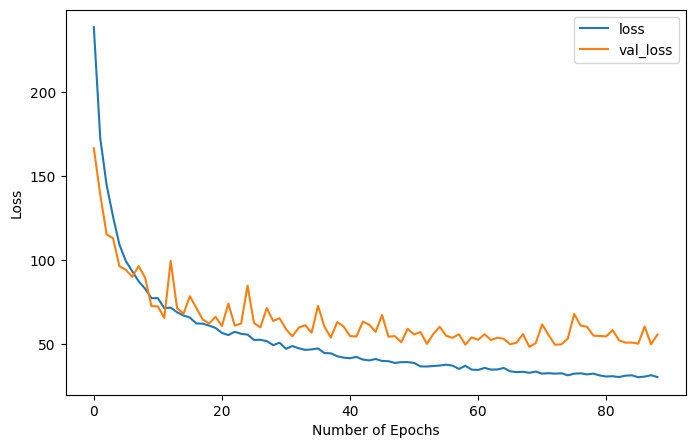

In [39]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [40]:
# loss = model.evaluate(np.array(x_origin_test), np.array(y_test), batch_size=16)
# print('RMSE is :', loss ** 0.5)

In [41]:
y_predict_class = np.zeros(len(y_predict))

for i in range(len(y_predict)):
    if y_predict[i] < 15.5:
        y_predict_class[i] = 0
    elif y_predict[i] >= 15.5 and y_predict[i] < 35.5:
        y_predict_class[i] = 1
    elif y_predict[i] >= 35.5 and y_predict[i] < 54.5:
        y_predict_class[i] = 2
    elif y_predict[i] >= 54.5 and y_predict[i] < 150.5:
        y_predict_class[i] = 3
    elif y_predict[i] >= 150.5 and y_predict[i] < 250.5:
        y_predict_class[i] = 4
    elif y_predict[i] >= 250.5 and y_predict[i] < 500.4:
        y_predict_class[i] = 5
    else:
        print('Exception Occured!')
    
y_predict_class = y_predict_class.astype(int)
    
    
y_predict_class

Exception Occured!
Exception Occured!
Exception Occured!


array([4, 4, 0, ..., 2, 4, 2])

In [ ]:
y_test_class = np.zeros(len(y_test))

for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5
    else:
        print('Exception Occured!')


In [56]:
y_test[1]

174.0

In [63]:
y_pred = np.squeeze(y_predict)
y_pred[1]

174.88594

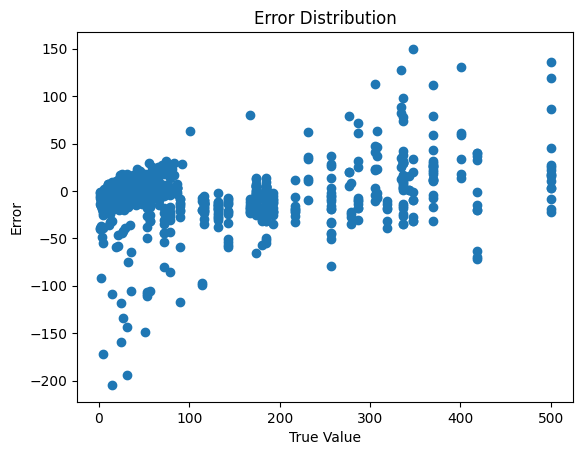

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# 將資料轉換為 NumPy 陣列
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# 計算誤差
error = y_test - y_pred

# 繪製散點圖
plt.scatter(y_test, error)
plt.xlabel('True Value')
plt.ylabel('Error')
plt.title('Error Distribution')
plt.show()


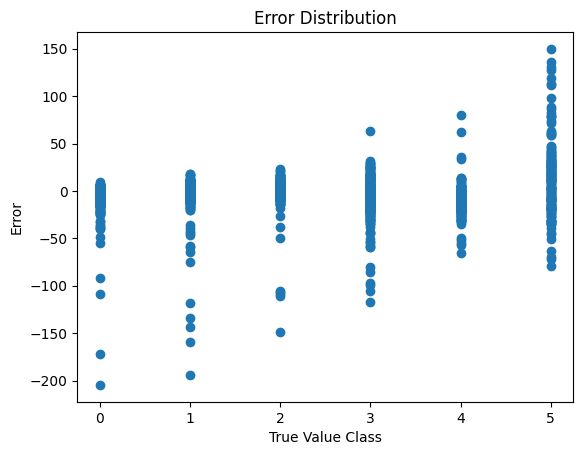

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# 將資料轉換為 NumPy 陣列
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# 計算誤差
error = y_test - y_pred

# 建立空陣列 y_test_class
y_test_class = np.zeros_like(y_test)

# 將 y_test 值劃分為不同的區間
for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5

# 繪製散點圖
plt.scatter(y_test_class, error)
plt.xlabel('True Value Class')
plt.ylabel('Error')
plt.title('Error Distribution')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

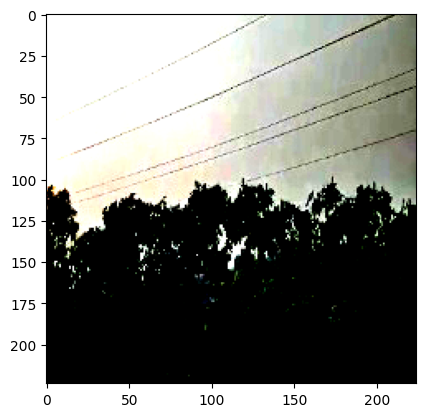

In [79]:
for i in range(len(y_test)):
    if error[i] >50:
        plt.imshow(x_origin_test[i])
        

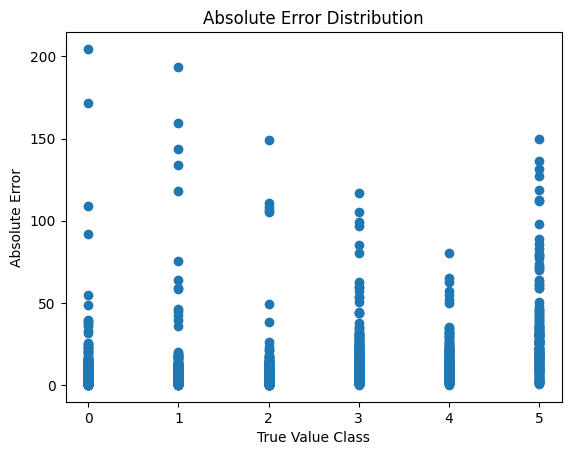

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# 將資料轉換為 NumPy 陣列
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# 計算誤差
error = y_test - y_pred

# 取絕對值
error_abs = np.abs(error)

# 建立空陣列 y_test_class
y_test_class = np.zeros_like(y_test)

# 將 y_test 值劃分為不同的區間
for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5

# 繪製散點圖
plt.scatter(y_test_class, error_abs)
plt.xlabel('True Value Class')
plt.ylabel('Absolute Error')
plt.title('Absolute Error Distribution')
plt.show()


Class 0 - Mean Error: 9.063446202194482, Standard Deviation: 18.813147622121924
           25th Percentile: 2.149974822998047, Median: 4.8285064697265625, 75th Percentile: 9.275720596313477, 99th Percentile: 15.979389572143553
Class 1 - Mean Error: 9.459202507794913, Standard Deviation: 20.884118857566072
           25th Percentile: 2.4277286529541016, Median: 5.058313369750977, 75th Percentile: 9.111021995544434, 99th Percentile: 13.052700042724613
Class 2 - Mean Error: 8.099682204714933, Standard Deviation: 15.652631798361947
           25th Percentile: 2.2243804931640625, Median: 5.329769134521484, 75th Percentile: 8.753885269165039, 99th Percentile: 12.77948532104493
Class 3 - Mean Error: 17.12246888209956, Standard Deviation: 18.492301161788344
           25th Percentile: 5.516331481933591, Median: 12.88467712402344, 75th Percentile: 21.654266357421875, 99th Percentile: 31.722210693359383
Class 4 - Mean Error: 14.441955384754, Standard Deviation: 12.926709380947386
           25th

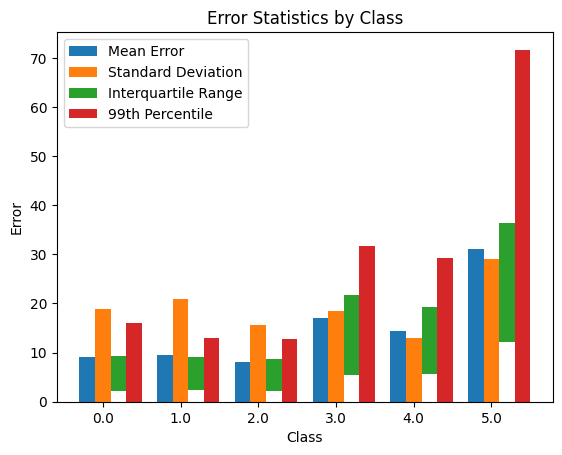

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# 將資料轉換為 NumPy 陣列
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# 計算誤差
error = y_test - y_pred

# 建立空陣列 y_test_class
y_test_class = np.zeros_like(y_test)

# 將 y_test 值劃分為不同的區間
for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5

# 計算每個類別的誤差平均值、標準差和百分位數（取絕對值）
classes = np.unique(y_test_class)
mean_error = []
std_error = []
percentile_25 = []
median_error = []
percentile_75 = []
percentile_99 = []

for cls in classes:
    cls_error = error[y_test_class == cls]
    abs_error = np.abs(cls_error)  # 將誤差值取絕對值
    mean = np.mean(abs_error)
    std = np.std(abs_error)
    p25 = np.percentile(abs_error, 25)  # 計算百分位數（25%）
    median = np.median(abs_error)  # 計算中位數
    p75 = np.percentile(abs_error, 75)  # 計算百分位數（75%）
    p99 = np.percentile(abs_error, 90)  # 計算百分位數（99%）
    mean_error.append(mean)
    std_error.append(std)
    percentile_25.append(p25)
    median_error.append(median)
    percentile_75.append(p75)
    percentile_99.append(p99)

# 轉換成 NumPy 陣列
mean_error = np.array(mean_error)
std_error = np.array(std_error)
percentile_25 = np.array(percentile_25)
median_error = np.array(median_error)
percentile_75 = np.array(percentile_75)
percentile_99 = np.array(percentile_99)

# 列印每個類別的誤差統計數據
for i, cls in enumerate(classes):
    print(f"Class {int(cls)} - Mean Error: {mean_error[i]}, Standard Deviation: {std_error[i]}")
    print(f"           25th Percentile: {percentile_25[i]}, Median: {median_error[i]}, 75th Percentile: {percentile_75[i]}, 99th Percentile: {percentile_99[i]}")

# 繪製誤差平均值、標準差和百分位數的長條圖
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, mean_error, width, label='Mean Error')
ax.bar(x, std_error, width, label='Standard Deviation')
ax.bar(x + width, percentile_75 - percentile_25, width, bottom=percentile_25, label='Interquartile Range')
ax.bar(x + 2 * width, percentile_99, width, label='99th Percentile')

ax.set_xlabel('Class')
ax.set_ylabel('Error')
ax.set_title('Error Statistics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


In [42]:
y_test_class = np.zeros(len(y_test))

for i in range(len(y_test)):
    if y_test[i] >= 0.0 and y_test[i] < 15.5:
        y_test_class[i] = 0
    elif y_test[i] >= 15.5 and y_test[i] < 35.5:
        y_test_class[i] = 1
    elif y_test[i] >= 35.5 and y_test[i] < 54.5:
        y_test_class[i] = 2
    elif y_test[i] >= 54.5 and y_test[i] < 150.5:
        y_test_class[i] = 3
    elif y_test[i] >= 150.5 and y_test[i] < 250.5:
        y_test_class[i] = 4
    elif y_test[i] >= 250.5 and y_test[i] < 500.4:
        y_test_class[i] = 5
    else:
        print('Exception Occured!')

y_test_class = y_test_class.astype(int)
        
        
y_test_class

array([3, 4, 0, ..., 2, 4, 2])

In [43]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test_class, y_predict_class)

0.753184512697374

In [44]:
t = 0
n = 0

for i in range(len(y_predict_class)):
    if y_predict_class[i] == y_test_class[i]:
        t = t + 1
    else:
        n = n + 1
        
acc = t / len(y_predict_class)

print('Acc: ', acc, ' True: ', t, ' False: ', n)

Acc:  0.7266903914590748  True:  1021  False:  384


In [45]:
#result is the classification result confusion matrix

result = np.zeros((6, 6))

for i in range(len(y_predict_class)):
    result[y_predict_class[i], y_test_class[i]] = result[y_predict_class[i], y_test_class[i]] + 1

result = result.astype(int)    

result

array([[171,  40,   0,   0,   0,   3],
       [100, 200,  61,   2,   0,   0],
       [  9,  41, 207,  53,   0,   0],
       [  3,  10,  11, 131,   1,   0],
       [  2,   4,   4,  27, 167,  13],
       [  0,   0,   0,   0,   0, 145]])

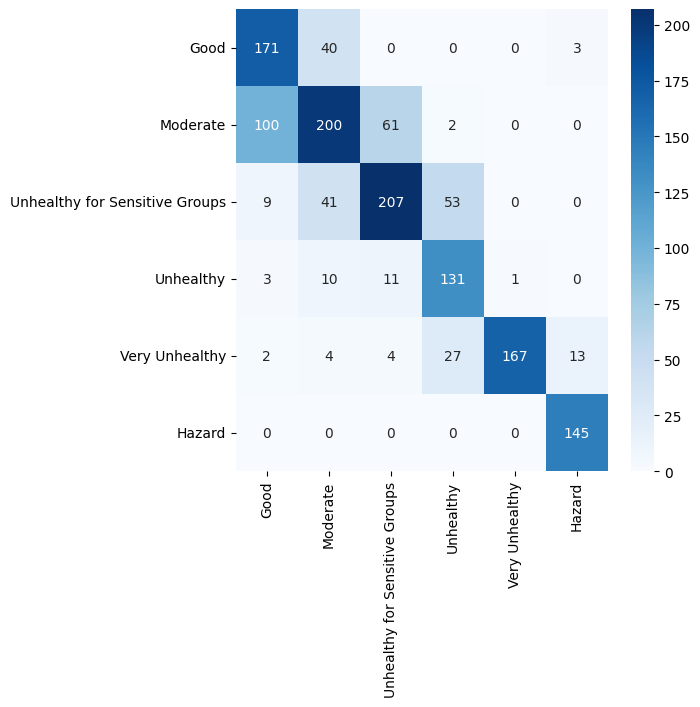

<Figure size 640x480 with 0 Axes>

In [46]:
#X axis is the predict label, Y axis is the true label
import seaborn as s

df = pd.DataFrame(result, index = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazard'],
                     columns = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazard'])

plt.figure(figsize = (6,6))

s.heatmap(df, annot=True, fmt='d', cmap='Blues')

fig = plt.gcf()
plt.show()
plt.draw()
# fig.savefig('./Shanghai_Result_img/Classification_result/Origin_VGG16_classification_acc.png', dpi=100, bbox_inches='tight')

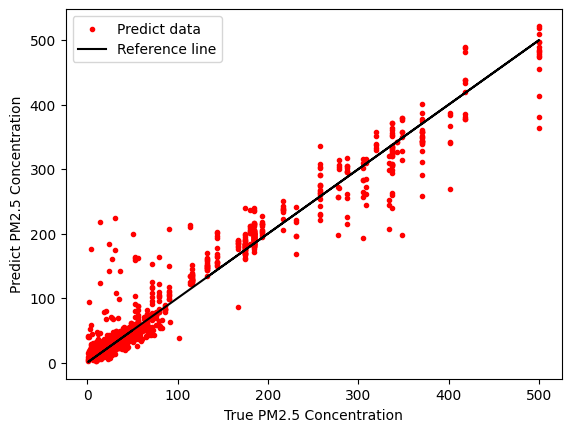

In [47]:
#---Plot Regression Result Image----
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, color = 'red', marker = '.', label = 'Predict data')
plt.plot(y_test, y_test, color = 'black', label = 'Reference line')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predict PM2.5 Concentration')
plt.legend()
# plt.savefig('./Beijing_Result_img/Regression_result/Origin_and_Saturation_AQDC-CNN_Regression_Result.jpg', dpi=200)
plt.show()

In [48]:
# model.save('./model_save/'+'DMK-CNN_Balance_agumentation_day_all_block7.h5')